In [1]:
from google.colab import files
files.upload()



Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"trivenipilla","key":"28639ba5c8c9a16f61055114abf4f125"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d uciml/sms-spam-collection-dataset
# https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

Dataset URL: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
License(s): unknown
  0% 0.00/211k [00:00<?, ?B/s]
100% 211k/211k [00:00<00:00, 98.6MB/s]


In [4]:
import zipfile

# Unzip the downloaded file
with zipfile.ZipFile('sms-spam-collection-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('sms_spam')


In [5]:
import pandas as pd
import numpy as np

In [10]:
'''

Classify SMS messages as spam or not spam using 1D CNN on Spam collection dataset..
help me analyze dataset: how many records are there, plot graph ..x axis has spam , ham y axis with number of messages count in dataset

SyntaxError: incomplete input (<ipython-input-10-4baf4f81eb3b>, line 1)

In [6]:
import pandas as pd

data_path = '/content/sms_spam/spam.csv'
df = pd.read_csv(data_path, encoding='latin1')

print("Dataset overview:")
print(df.info())
print("\nFirst few rows of the dataset:")
print(df.head())


Dataset overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None

First few rows of the dataset:
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  


In [7]:
# Rename relevant columns
df = df.rename(columns={"v1": "Label", "v2": "Message"})

df = df[['Label', 'Message']]





In [8]:

print("Cleaned Dataset overview:")
print(df.info())
print("\nFirst few rows of the cleaned dataset:")
print(df.head())



Cleaned Dataset overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Label    5572 non-null   object
 1   Message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None

First few rows of the cleaned dataset:
  Label                                            Message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [9]:
label_counts = df['Label'].value_counts()
print("\nLabel distribution:")
print(label_counts)




Label distribution:
Label
ham     4825
spam     747
Name: count, dtype: int64


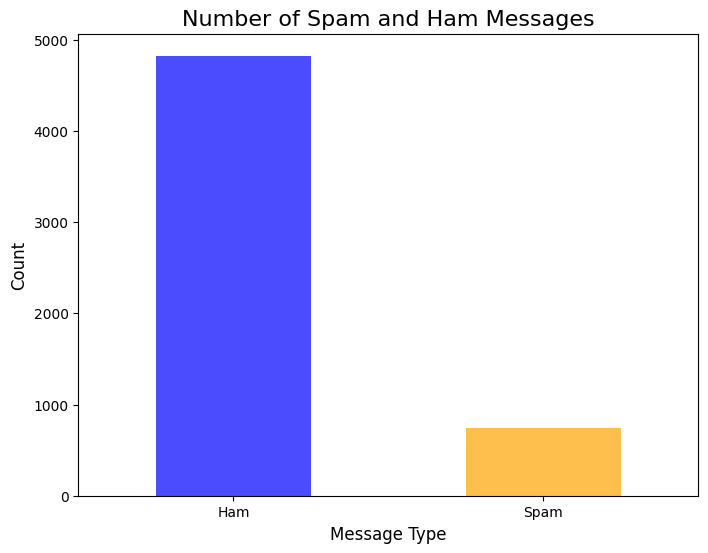

In [10]:
# Visualize the label distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar', color=['blue', 'orange'], alpha=0.7)
plt.title('Number of Spam and Ham Messages', fontsize=16)
plt.xlabel('Message Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Ham', 'Spam'], fontsize=10, rotation=0)
plt.show()

In [11]:
from nltk.corpus import wordnet
import random
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.add(lemma.name())
    if word in synonyms:
        synonyms.remove(word)
    return list(synonyms)

def synonym_replacement(text, n=2):
    words = text.split()
    random_words = random.sample(words, min(len(words), n))
    new_words = words.copy()
    for word in random_words:
        synonyms = get_synonyms(word)
        if synonyms:
            new_words[new_words.index(word)] = random.choice(synonyms)
    return " ".join(new_words)

# Augment spam messages
augmented_spam = df[df['Label'] == 'spam']['Message'].apply(lambda x: synonym_replacement(x, n=2))

# Append augmented data to the original DataFrame
augmented_df = pd.DataFrame({'Label': 'spam', 'Message': augmented_spam})
df = pd.concat([df, augmented_df], ignore_index=True)

print("New dataset size:", df.shape)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


New dataset size: (6319, 2)


In [12]:
label_counts = df['Label'].value_counts()
print("\nLabel distribution:")
print(label_counts)




Label distribution:
Label
ham     4825
spam    1494
Name: count, dtype: int64


In [ ]:
'''# Example using the `translate` package (requires installation)
from translate import Translator

translator_to_fr = Translator(to_lang="fr")  # Translate to French
translator_to_en = Translator(to_lang="en")  # Back to English

def back_translation(text):
    try:
        french_text = translator_to_fr.translate(text)
        english_text = translator_to_en.translate(french_text)
        return english_text
    except:
        return text  # Fallback in case of error

# Augment spam messages
translated_spam = df[df['Label'] == 'spam']['Message'].apply(back_translation)

# Append augmented data to the original DataFrame
translated_df = pd.DataFrame({'Label': 'spam', 'Message': translated_spam})
df = pd.concat([df, translated_df], ignore_index=True)

print("New dataset size after back translation:", df.shape)
'''

In [13]:
label_counts = df['Label'].value_counts()
print("\nLabel distribution:")
print(label_counts)


Label distribution:
Label
ham     4825
spam    1494
Name: count, dtype: int64


In [14]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [15]:
label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])  # ham -> 0, spam -> 1



In [16]:
# Tokenize the text
max_words = 10000  # Vocabulary size
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df['Message'])


In [17]:

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(df['Message'])


In [18]:

# Pad sequences
max_length = 100  # Maximum length of SMS
X = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

# Prepare labels
y = np.array(df['Label'])


In [19]:
print(X)

[[  51  487 5500 ...    0    0    0]
 [  55  416 1771 ...    0    0    0]
 [  26  311   10 ...    0    0    0]
 ...
 [ 141   11 1302 ...    0    0    0]
 [2156   42 1011 ...    0    0    0]
 [  38    9    6 ...    0    0    0]]


In [20]:
print(y)

[0 0 1 ... 1 1 1]


In [22]:
print(len(X))
print(len(y))

6319
6319


In [23]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}, Test samples: {len(X_test)}")

Training samples: 5055, Test samples: 1264


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
import numpy as np

# Define constants
max_words = 10000
embedding_dim = 128
max_length = 100
filters = 64
kernel_size = 5
dropout_rate = 0.5

# Build the model
model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_length),
    Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'),
    GlobalMaxPooling1D(),
    Dropout(dropout_rate),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Pass dummy data to build the model
dummy_input = np.zeros((1, max_length))  # Example input batch with one sequence
model(dummy_input)  # This builds the model

# Display the model summary
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (1, 100, 128)               │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (1, 96, 64)                 │          41,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_2               │ (1, 64)                     │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (1, 64)                     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (1, 10)                     │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (1, 1)                      │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,321,685 (5.04 MB)

 Trainable params: 1,321,685 (5.04 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Set training parameters
batch_size = 32
epochs = 10

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=batch_size,
    epochs=epochs
)

print("Model training complete.")


Epoch 1/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9965 - loss: 0.0118 - val_accuracy: 0.9873 - val_loss: 0.0272
Epoch 2/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9994 - loss: 0.0040 - val_accuracy: 0.9929 - val_loss: 0.0252
Epoch 3/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9996 - loss: 0.0022 - val_accuracy: 0.9937 - val_loss: 0.0283
Epoch 4/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9999 - loss: 8.0636e-04 - val_accuracy: 0.9905 - val_loss: 0.0326
Epoch 5/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.9929 - val_loss: 0.0328
Epoch 6/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 4.1420e-04 - val_accuracy: 0.9921 - val_loss: 0.0359
Epoch 7/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1.8678e-04 - val_accuracy: 0.9921 - val_loss: 0.0378
Epoch 8/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9997 - loss: 8.3845e-04 -

In [34]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {accuracy:.2f}")



40/40 - 0s - 2ms/step - accuracy: 0.9889 - loss: 0.0501
Test Accuracy: 0.99


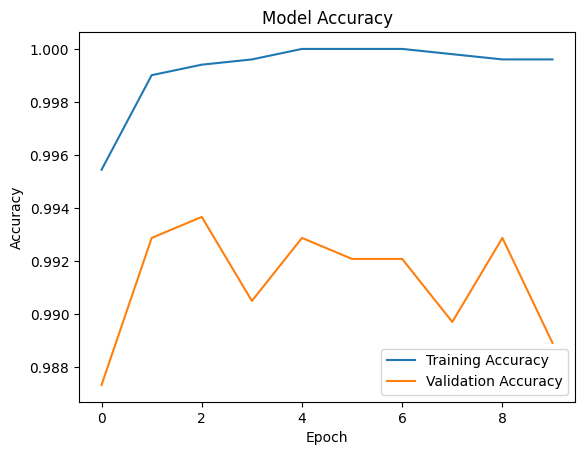

In [35]:
# Plot training and validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


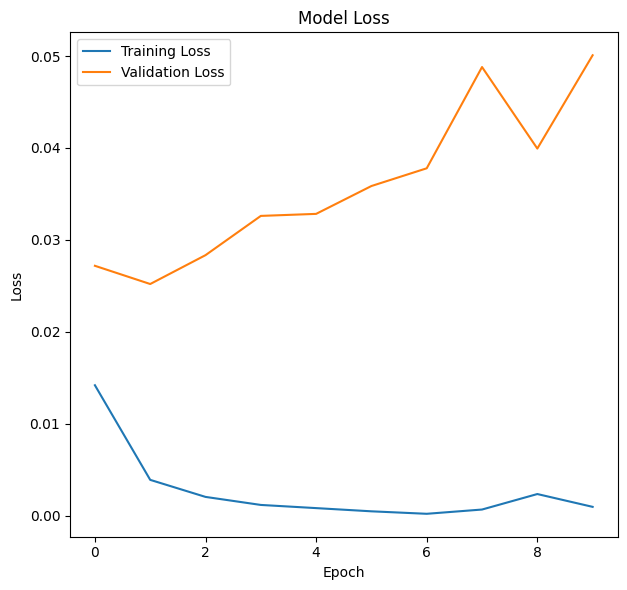

In [39]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [36]:
# Predict on test data
predictions = model.predict(X_test)
predicted_labels = (predictions > 0.5).astype(int)

# Example predictions
for i in range(5):
    print(f"Message: {tokenizer.sequences_to_texts([X_test[i]])}")
    print(f"Actual Label: {y_test[i]}, Predicted Label: {predicted_labels[i][0]}")
    print("---")


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Message: ['good afternoon my love it was good to see your words on ym and get your tm very smart move my slave smiles i drink my coffee and await you <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV>']
Actual Label: 0, Predicted Label: 0
---
Message: ["you can donate å£2 50 to unicef's asian tsunami disaster support fund by texting donate to 864233 å£2 50 will follow added to your next bill <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV>

In [ ]:
# Logistic regression



In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report



In [40]:
# Ensure X_train and X_test are lists of strings
X_train_list = X_train.tolist()
X_test_list = X_test.tolist()

# Now apply TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = vectorizer.fit_transform(X_train_list)
X_test_tfidf = vectorizer.transform(X_test_list)


AttributeError: 'list' object has no attribute 'lower'

In [ ]:

# Train the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)


In [ ]:

# Evaluate the Logistic Regression model
lr_predictions = lr_model.predict(X_test_tfidf)
print("Logistic Regression Performance:")
print(classification_report(y_test, lr_predictions))